<a href="https://colab.research.google.com/github/peterbmob/Labs/blob/main/Frederike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%%capture
!apt install subversion
!svn checkout https://github.com/ThijsSmolders/Tantalizing/trunk/first_run/
!pip install ase
!pip install cvxopt
!git clone https://github.com/Teoroo-CMC/CCS.git
!pip install --upgrade --no-cache-dir git+https://github.com/ppmd/ppmd@master
!pip install git+https://github.com/yqshao/ase-notebook.git
!pip install pythreejs

In [3]:
import sys,os
sys.path.append('/content/CCS/src')
import matplotlib.pyplot as plt

from ase.io import read,write
from ase.build import bulk
import numpy as np
import ase.db as db
from ase.visualize import view
from ase.optimize import BFGS
Fit_on_forces=True


In [7]:
cd first_run

/content/first_run


In [18]:
ls

CCS_error_forces.out        CCS_validate.dat  output.traj
CCS_error.out               CCS_validate.db   structures.json
CCS_input_interpreted.json  data_list.txt     tutorial.ipynb
CCS_input.json              DFT.db            UNC_error_forces.out
CCS_params.json             outcar/           UNC_error.out
ccs.spl                     output.log        UNC_params.json


In [22]:
from ase.db import connect
db=connect('DFT.db')
magmom=[]
for row in db.select():
  atoms=row.toatoms()
  magmom.append(row.magmom)
  

In [23]:
magmom

[11.0000004,
 12.0000011,
 10.999964,
 9.9999995,
 4.0000006,
 6.9999994,
 5.999937,
 8.9999944,
 25.0000039,
 9.0000013,
 7.9999998,
 8.944607,
 12.0,
 26.0000034,
 13.0000012,
 26.0000038,
 26.0000054,
 13.0000011,
 26.0000037]

In [23]:
from ccs_fit.scripts.ccs_build_db import ccs_build_db
DFT_data="first_run/DFT.db"
ccs_build_db(mode="CCS",DFT_DB="DFT.db",file_list="data_list.txt",overwrite=True)

    Building data-bases: 100%|██████████| 19/19 [00:01<00:00, 18.32it/s]


In [24]:
from ccs_fit.scripts.ccs_fetch import ccs_fetch

ccs_fetch(mode="CCS",DFT_DB="DFT.db",include_forces=Fit_on_forces)



    Fetching data: 100%|██████████| 19/19 [00:01<00:00, 10.84it/s]


In [26]:
### Generate input.json file
import json

input={
    "General": {
        "interface": "CCS",
        "merging"  : "True"
    },
    "Twobody": {
                "Xx-Xx": {
                        "Rcut": 6.0,
                        "Resolution": 0.5,
                        "Swtype": "rep",
                        "const_type" : "Mono"
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)


In [27]:
#RUN FIT
from ccs_fit import ccs_fit

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['Co', 'Li', 'Mn', 'Ni', 'O', 'Ta']
    Generating two-body potentials from one-body information.
    Adding pair: Co-Co
    Adding pair: Co-Li
    Adding pair: Co-Mn
    Adding pair: Co-Ni
    Adding pair: Co-O
    Adding pair: Co-Ta
    Adding pair: Li-Li
    Adding pair: Li-Mn
    Adding pair: Li-Ni
    Adding pair: Li-O
    Adding pair: Li-Ta
    Adding pair: Mn-Mn
    Adding pair: Mn-Ni
    Adding pair: Mn-O
    Adding pair: Mn-Ta
    Adding pair: Ni-Ni
    Adding pair: Ni-O
    Adding pair: Ni-Ta
    Adding pair: O-O
    Adding pair: O-Ta
    Adding pair: Ta-Ta
    Applying monotonous constraints for pair:  Co-Co
    Applying monotonous constraints for pair:  Co-Li
    Applying monotonous constraints for pair:  Co-Mn
    Applying monotonous constraints for pair:  Co-Ni


CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Co-O
    Applying monotonous constraints for pair:  Co-Ta
    Applying monotonous constraints for pair:  Li-Li
    Applying monotonous constraints for pair:  Li-Mn
    Applying monotonous constraints for pair:  Li-Ni


CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Li-O
    Applying monotonous constraints for pair:  Li-Ta
    Applying monotonous constraints for pair:  Mn-Mn
    Applying monotonous constraints for pair:  Mn-Ni


CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Mn-O
    Applying monotonous constraints for pair:  Mn-Ta
    Applying monotonous constraints for pair:  Ni-Ni


CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Ni-O
    Applying monotonous constraints for pair:  Ni-Ta


CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  O-O


CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json
CRITICAL:ccs_fit.fitting.main:Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  O-Ta
    Applying monotonous constraints for pair:  Ta-Ta
    Merging intervall for pair Co-Co. Number of knots reduced from 2 to 2. 
    Merging intervall for pair Co-Li. Number of knots reduced from 7 to 6. 
    Merging intervall for pair Co-Mn. Number of knots reduced from 4 to 4. 
    Merging intervall for pair Co-Ni. Number of knots reduced from 8 to 6. 
    Merging intervall for pair Co-O. Number of knots reduced from 10 to 8. 
    Merging intervall for pair Co-Ta. Number of knots reduced from 8 to 5. 
    Merging intervall for pair Li-Li. Number of knots reduced from 9 to 7. 
    Merging intervall for pair Li-Mn. Number of knots reduced from 7 to 6. 
    Merging intervall for pair Li-Ni. Number of knots reduced from 7 to 7. 
    Merging intervall for pair Li-O. Number of knots reduced from 10 to 9. 
    Merging intervall for pair Li-Ta. Number of knots reduced from 7 to 7. 
    Merging intervall for pair Mn-Mn. Number of knots reduc

    Finding optimum switch: 100%|██████████| 1/1 [00:00<00:00, 30.82it/s]

    The best switch is (2, 6, 4, 6, 8, 5, 7, 6, 7, 9, 7, 2, 6, 7, 5, 7, 10, 8, 9, 9, 3) with mse: 0.52861 
    Final root mean square error in fit:  0.008332632935975536  (eV/atoms) [NOTE: Only elements specified in Onebody are considered!]


In [28]:
from ccs_fit.scripts.ccs_validate import ccs_validate
ccs_validate(mode="CCS",CCS_params="CCS_params.json",DFT_DB="DFT.db")

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)
100%|██████████| 19/19 [00:03<00:00,  5.64it/s]


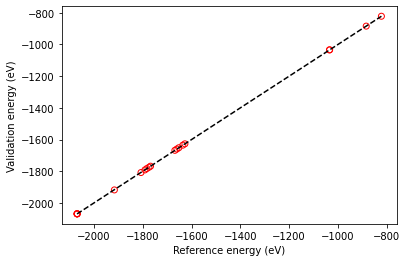

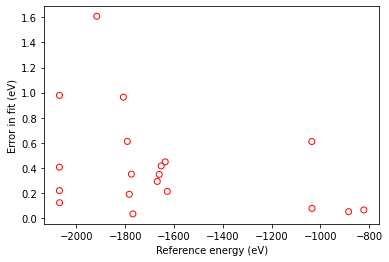

In [29]:
try:
    err=np.loadtxt("CCS_validate.dat")
    plt.xlabel('Reference energy (eV)')
    plt.ylabel('Validation energy (eV)')
    plt.plot( [min(err[:,0]),max(err[:,0])],[min(err[:,0]),max(err[:,0])],'--',color='black'  )
    plt.scatter(err[:,0],err[:,1],facecolors='none', edgecolors='red')
    plt.show()
    plt.xlabel('Reference energy (eV)')
    plt.ylabel('Error in fit (eV)')
    plt.scatter(err[:,0],err[:,2],facecolors='none', edgecolors='red')
    plt.show()
except:
    pass
    

In [11]:
# CCS
from ccs_fit.ase_calculator.ccs_ase_calculator import CCS 
from ase import io
from ase.optimize import FIRE
import json

with open("CCS_params.json", 'r') as f:
    CCS_params = json.load(f)

CCS_calc=CCS(CCS_params=CCS_params)

atoms = io.read("DFT.db@5")
                
atoms.calc = CCS_calc

In [12]:
from ase.optimize import BFGS

opt = BFGS(atoms, logfile=None)
#opt.run(fmax=0.01)
opt.run(steps=10)


/usr/local/lib/python3.8/dist-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)


False

In [13]:
atoms.get_potential_energy()

-1635.847522202882

In [14]:
# Read geometry optimized structure and run NVE Molecular dynamics 
from ase import units
from ase.io import read, write
from ase.io.trajectory import Trajectory
from ase.md import MDLogger
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.nptberendsen import NPTBerendsen
from ase.md.nvtberendsen import NVTBerendsen
from ase.md.verlet import VelocityVerlet
import numpy as np
from ase.io import read, write

rng = np.random.default_rng(10)
MaxwellBoltzmannDistribution(atoms, 873*units.kB, rng=rng)
dt = 0.5 * units.fs
steps = int(10)
dyn = VelocityVerlet(atoms, timestep=dt)
interval = int(1)
dyn.attach(MDLogger(dyn, atoms, 'output.log', mode="a"), interval=interval)
dyn.attach(Trajectory('output.traj', 'a', atoms).write, interval=interval)
dyn.run(steps)

/usr/local/lib/python3.8/dist-packages/ase/md/md.py:48: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


True

In [15]:
from ase_notebook import AseView, ViewConfig, get_example_atoms
config = ViewConfig()
ase_view = AseView(config)
ase_view = AseView(
    rotations="45x,45y,45z",
    atom_font_size=16,
    axes_length=30,
    canvas_size=(400, 400),
    zoom=1.2,
    show_bonds=True
)
ase_view.config.uc_dash_pattern=(.6,.4)
ase_view.add_miller_plane(
    1, 0, 0, color="green")
ase_view.config
ViewConfig(rotations='45x,45y,45z', element_colors='ase', element_radii='ase', radii_scale=0.89, atom_show_label=True, atom_label_by='element', atom_label_array='', atom_font_size=16, atom_font_color='black', atom_stroke_width=1.0, atom_stroke_opacity=0.95, atom_color_by='element', atom_color_array='', atom_colormap='jet', atom_colormap_range=(None, None), atom_lighten_by_depth=0.0, atom_opacity=0.95, force_vector_scale=1.0, velocity_vector_scale=1.0, ghost_stroke_width=0.0, ghost_lighten=0.0, ghost_opacity=0.4, ghost_stroke_opacity=0.4, ghost_show_label=False, ghost_cross_out=False, show_unit_cell=True, show_uc_repeats=False, uc_dash_pattern=(0.6, 0.4), uc_color='black', show_bonds=True, bond_radii_scale=1.5, bond_array_name=None, bond_pairs_filter=None, bond_opacity=0.8, bond_color_by='atoms', bond_colormap='jet', bond_colormap_range=(None, None), show_miller_planes=True, miller_planes=({'h': 1, 'k': 0, 'l': 0, 'fill_color': 'green', 'stroke_color': 'green', 'stroke_width': 1, 'fill_opacity': 0.5, 'stroke_opacity': 0.9},), miller_as_lines=False, show_axes=True, axes_uc=False, axes_length=30, axes_font_size=14, axes_line_color='black', axes_offset=(20, 20), canvas_size=(400, 400), canvas_color_foreground='#000000', canvas_color_background='#ffffff', canvas_background_opacity=0.0, canvas_crop=None, zoom=1.2, camera_fov=10.0, gui_swap_mouse=False)


ViewConfig(rotations='45x,45y,45z', element_colors='ase', element_radii='ase', radii_scale=0.89, atom_show_label=True, atom_label_by='element', atom_label_array='', atom_font_size=16, atom_font_color='black', atom_stroke_width=1.0, atom_stroke_opacity=0.95, atom_color_by='element', atom_color_array='', atom_colormap='jet', atom_colormap_range=(None, None), atom_lighten_by_depth=0.0, atom_opacity=0.95, force_vector_scale=1.0, velocity_vector_scale=1.0, ghost_stroke_width=0.0, ghost_lighten=0.0, ghost_opacity=0.4, ghost_stroke_opacity=0.4, ghost_show_label=False, ghost_cross_out=False, show_unit_cell=True, show_uc_repeats=False, uc_dash_pattern=(0.6, 0.4), uc_color='black', show_bonds=True, bond_radii_scale=1.5, bond_array_name=None, bond_pairs_filter=None, bond_opacity=0.8, bond_color_by='atoms', bond_colormap='jet', bond_colormap_range=(None, None), show_miller_planes=True, miller_planes=({'h': 1, 'k': 0, 'l': 0, 'fill_color': 'green', 'stroke_color': 'green', 'stroke_width': 1, 'fill_

In [16]:
from google.colab import output
output.enable_custom_widget_manager()
#atoms=get_example_atoms()

ase_view.config.canvas_color_background = "blue"
ase_view.config.canvas_background_opacity = 0.2
# ase_view.config.atom_show_label = False
gui = ase_view.make_render(
    atoms, center_in_uc=True,create_gui=False)
gui

Renderer(camera=PerspectiveCamera(fov=10.0, position=(0.0, 0.0, 129.6685533646023), projectionMatrix=(1.0, 0.0…

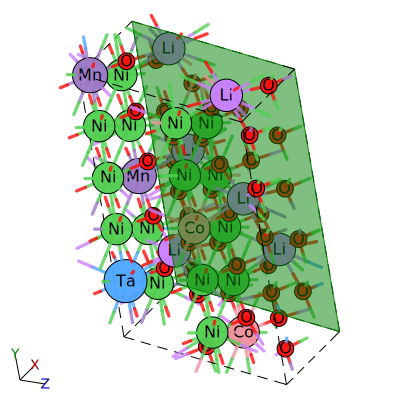

In [35]:
ase_view.config.atom_show_label = True
ase_view.config.canvas_background_opacity = 0.0
svg = ase_view.make_svg(atoms, center_in_uc=True)
svg